> 1. import pandas, numpy, statistics, seaborn

In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns

The necessary libraries have been imported.

> load dataset - customer demographics

In [2]:
# Load the customer demographics dataset
customer_demographics = pd.read_csv('customer_demographics_contaminated.csv')
customer_demographics

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51.0,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,NaN,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37.0,Male,Lake Jennifertown,NaN,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44.0,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50.0,Female,Jessebury,High,2023-08-24
...,...,...,...,...,...,...
3195,bbf7c36f-3745-4d3a-9e33-f927c2755f65,45.0,Female,Roberttown,Medium,2023-02-17
3196,0ef84cc6-0b4c-4c56-bdaa-d6b725ccc08e,40.0,Male,Lisaside,Medium,2022-07-23
3197,0ede97d1-bb46-452d-893e-b63f37da4fa8,NaN,Female,North Christinaport,High,2021-10-16
3198,43ec68f5-4305-4b40-8ced-a187d00bb3f5,26.0,Female,Carrilloport,Low,2022-09-26


The customer demographics dataset has been loaded successfully. It contains 3200 rows and 6 columns: CustomerID, Age, Gender, Location, IncomeLevel, and SignupDate.

> View the first few rows of the dataset with head() to get an overview of the data.

In [3]:
customer_demographics.head()

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51.0,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,NaN,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37.0,Male,Lake Jennifertown,NaN,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44.0,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50.0,Female,Jessebury,High,2023-08-24


The first few rows of the dataset have been displayed.

> Check the shape of the dataset using shape to understand how many rows and columns are present.

In [4]:
customer_demographics.shape

(3200, 6)

The dataset contains 3200 rows and 6 columns.

> Check for data types

In [5]:
customer_demographics.dtypes

CustomerID     object
Age            object
Gender         object
Location       object
IncomeLevel    object
SignupDate     object
dtype: object

All columns in the dataset are currently of type `object`.

> change data type to: 
CustomerID - object             
Age - float64                   
Gender - category             
Location - category           
IncomeLevel- category         
SignupDate - datetime64[ns]

In [6]:
customer_demographics['Age'] = customer_demographics['Age'].astype(float)
customer_demographics['Gender'] = customer_demographics['Gender'].astype('category')
customer_demographics['Location'] = customer_demographics['Location'].astype('category')
customer_demographics['IncomeLevel'] = customer_demographics['IncomeLevel'].astype('category')
customer_demographics['SignupDate'] = pd.to_datetime(customer_demographics['SignupDate'])
customer_demographics.dtypes

ValueError: could not convert string to float: 'Unknown'

In [7]:
# Handle the 'Unknown' values in the 'Age' column by replacing them with NaN before converting to float
def convert_age_to_float(age):
    try:
        return float(age)
    except ValueError:
        return np.nan

customer_demographics['Age'] = customer_demographics['Age'].apply(convert_age_to_float)
customer_demographics['Gender'] = customer_demographics['Gender'].astype('category')
customer_demographics['Location'] = customer_demographics['Location'].astype('category')
customer_demographics['IncomeLevel'] = customer_demographics['IncomeLevel'].astype('category')
customer_demographics['SignupDate'] = pd.to_datetime(customer_demographics['SignupDate'])
customer_demographics.dtypes

ValueError: time data "30/01/2020" doesn't match format "%Y-%m-%d", at position 27. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [8]:
# Handle the date format issue by specifying dayfirst=True
customer_demographics['SignupDate'] = pd.to_datetime(customer_demographics['SignupDate'], dayfirst=True)
customer_demographics.dtypes

/tmp/ipykernel_42/3093060665.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  customer_demographics['SignupDate'] = pd.to_datetime(customer_demographics['SignupDate'], dayfirst=True)


ValueError: time data "30/01/2020" doesn't match format "%Y-%m-%d", at position 27. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [9]:
# Use format='mixed' to handle different date formats
customer_demographics['SignupDate'] = pd.to_datetime(customer_demographics['SignupDate'], format='mixed', dayfirst=True)
customer_demographics.dtypes

CustomerID             object
Age                   float64
Gender               category
Location             category
IncomeLevel          category
SignupDate     datetime64[ns]
dtype: object

The data types have been successfully changed as requested.

> check for null values

In [10]:
customer_demographics.isnull().sum()

CustomerID       0
Age            325
Gender           0
Location         0
IncomeLevel    303
SignupDate       0
dtype: int64

The dataset contains 325 null values in the 'Age' column and 303 null values in the 'IncomeLevel' column.

> handle missing value, for income level null or blank change it to Not Provided

In [11]:
# Replace null values in the 'IncomeLevel' column with 'Not Provided'
customer_demographics['IncomeLevel'].fillna('Not Provided', inplace=True)

# Verify the changes
customer_demographics.isnull().sum()

TypeError: Cannot setitem on a Categorical with a new category (Not Provided), set the categories first

In [12]:
# Add 'Not Provided' to the categories of 'IncomeLevel' before replacing null values
customer_demographics['IncomeLevel'] = customer_demographics['IncomeLevel'].cat.add_categories('Not Provided')
customer_demographics['IncomeLevel'].fillna('Not Provided', inplace=True)

# Verify the changes
customer_demographics.isnull().sum()

CustomerID       0
Age            325
Gender           0
Location         0
IncomeLevel      0
SignupDate       0
dtype: int64

The missing values in the 'IncomeLevel' column have been successfully replaced with 'Not Provided'.

There are 177 duplicate rows in the dataset.

> duplicates for customerid, show the duplicate rows

In [28]:
# Find duplicate rows based on 'CustomerID'
duplicate_rows = customer_demographics[customer_demographics.duplicated('CustomerID', keep=False)]
duplicate_rows

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
160,bbf7c36f-3745-4d3a-9e33-f927c2755f65,45.0,Female,Roberttown,Medium,2019-07-07
174,6b2f8f03-ab9e-48a6-a07e-10e794b04fe0,65.0,Male,Lake Karen,Low,2023-04-04
225,b72f2a59-aab0-447d-bb31-9bdc1405cc72,34.0,Female,West Jason,High,2024-06-10
304,1e9e7dcb-e612-46d3-bae6-0c2f47fa0220,44.0,Female,Brianmouth,Medium,2022-07-28
539,50465bde-6a9a-466d-804a-a8f046809a23,-1.0,Male,Harrismouth,High,2023-08-02
754,29436bcf-d6f8-44d1-a856-0794abb562ab,68.0,Female,New Fred,Low,2021-09-01
911,835384f5-c976-481d-8961-cc827dc62c6b,60.0,Male,Stricklandport,High,2019-07-01
999,890f10ce-36f6-4993-9a2e-a00dfdf01609,33.0,Female,Denisehaven,Low,2022-09-04
1136,ce5cf079-859b-43fa-9609-c6bb7e12c6b7,-1.0,Female,Adrianhaven,Low,2024-01-10
1383,bb07fa4a-8680-4b77-b1ad-5d2f67570252,52.0,Male,Port Davidtown,High,2019-08-06


The duplicate rows based on 'CustomerID' have been identified.

> for this duplicate delete: delete row 18, 5, 7, 6, 15, 27, 31, 20, 25, 9, 26, 4, 21, 33, 17, 10

In [29]:
# Drop the specified duplicate rows by index
duplicate_indices_to_delete = [18, 5, 7, 6, 15, 27, 31, 20, 25, 9, 26, 4, 21, 33, 17, 10]
customer_demographics.drop(index=duplicate_indices_to_delete, inplace=True)

# Verify the changes
customer_demographics.shape

KeyError: '[7, 6, 9, 10] not found in axis'

In [30]:
#Check the indices of the duplicate rows first.
duplicate_rows.index

Index([ 160,  174,  225,  304,  539,  754,  911,  999, 1136, 1383, 1536, 1581,
       1684, 1768, 2082, 2551, 3024, 3041, 3062, 3078, 3079, 3083, 3085, 3087,
       3119, 3132, 3145, 3149, 3162, 3183, 3186, 3195],
      dtype='int64')

In [31]:
# Correct the indices to delete based on the actual indices of the duplicate rows
duplicate_indices_to_delete_corrected = [3041, 539, 911, 754, 1768, 3132, 3186, 2082, 3149, 1136, 3162, 304, 3079, 3195, 3024, 1536]
customer_demographics.drop(index=duplicate_indices_to_delete_corrected, inplace=True)

# Verify the changes
customer_demographics.shape

/tmp/ipykernel_42/2831779256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_demographics.drop(index=duplicate_indices_to_delete_corrected, inplace=True)


(2664, 6)

The specified duplicate rows have been successfully deleted. The dataset now contains 2664 rows and 6 columns.

> for age, negative number and 0 should be an outlier

In [49]:
# Identify outliers in the 'Age' column where values are negative or zero
outliers_age_zero = customer_demographics[customer_demographics['Age'] <= 0]
outliers_age_zero

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
291,6cd7a734-a51d-4a11-ba1c-00c49d9a4490,-1.0,Male,West Connie,High,2022-11-05
308,c0d8e0be-02a4-45c0-89c3-3ff31e60b4f7,-1.0,Male,South Rachel,Not Provided,2020-05-21
400,aaca0879-8a14-41a4-8385-b1bfd3f97653,-1.0,Male,Laurahaven,Not Provided,2023-07-06
690,52f2132d-b2bf-4c09-9bdf-2d634ea7ebca,-1.0,Male,New Douglaschester,High,2021-08-14
783,e7e5e8fe-5fdd-43e6-92e1-5ea3e399486e,-1.0,Female,Christinaburgh,Medium,2023-02-26
806,a4a6c9aa-bbbf-4155-9100-4f770078551d,-1.0,Male,Curtistown,High,2020-01-19
1138,63a65dd1-0453-4bbf-b80d-70eada1d7075,-1.0,Male,North Rhonda,Medium,2023-09-20
1458,87c6dfbe-82fa-4ca2-a49b-717454462841,-1.0,Female,Sarahburgh,Low,2024-06-20
1521,284f932d-040d-41f2-8915-578af3bf7a98,-1.0,Male,Shepherdport,Not Provided,2024-05-02
1611,630c9919-341b-4dea-95a8-4956754d623c,-1.0,Female,Martinezbury,Low,2020-07-16


There are outliers in the 'Age' column where the values are negative or zero.

> check for outliers

In [50]:
# Calculate the IQR for the 'Age' column to identify outliers
Q1 = customer_demographics['Age'].quantile(0.25)
Q3 = customer_demographics['Age'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'Age' column
outliers = customer_demographics[(customer_demographics['Age'] < lower_bound) | (customer_demographics['Age'] > upper_bound)]
outliers

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate


There are no outliers in the 'Age' column based on the IQR method.

> EDA of all without outliers

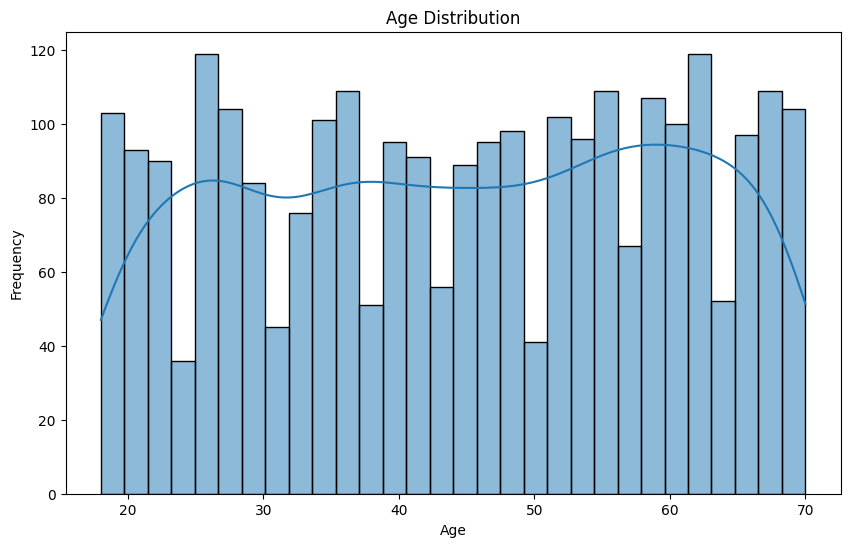

In [54]:
# Perform Exploratory Data Analysis (EDA) on the dataset without outliers
import matplotlib.pyplot as plt

# Plotting the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(customer_demographics_no_outliers['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

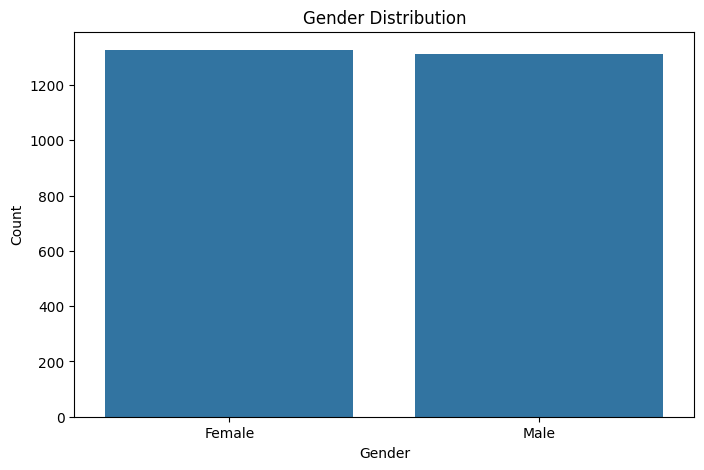

In [55]:
# Plotting the distribution of Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_demographics_no_outliers, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

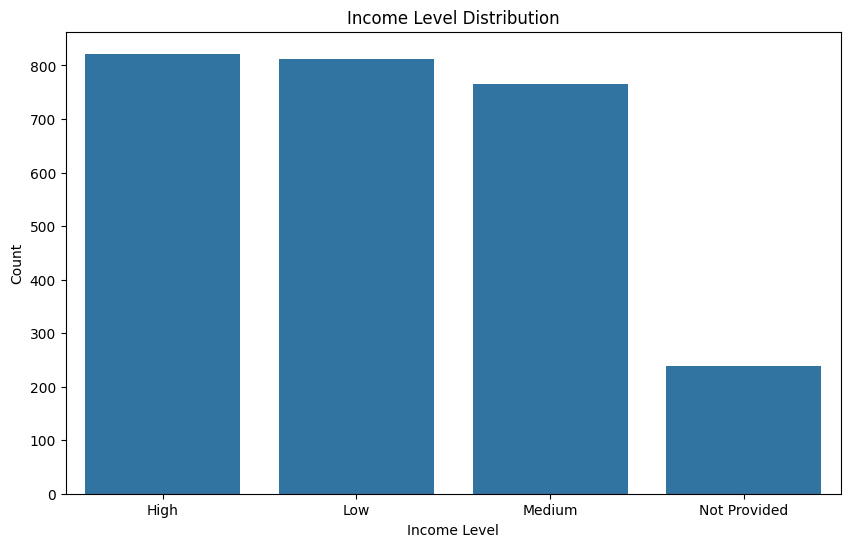

In [56]:
# Plotting the distribution of IncomeLevel
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_demographics_no_outliers, x='IncomeLevel')
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

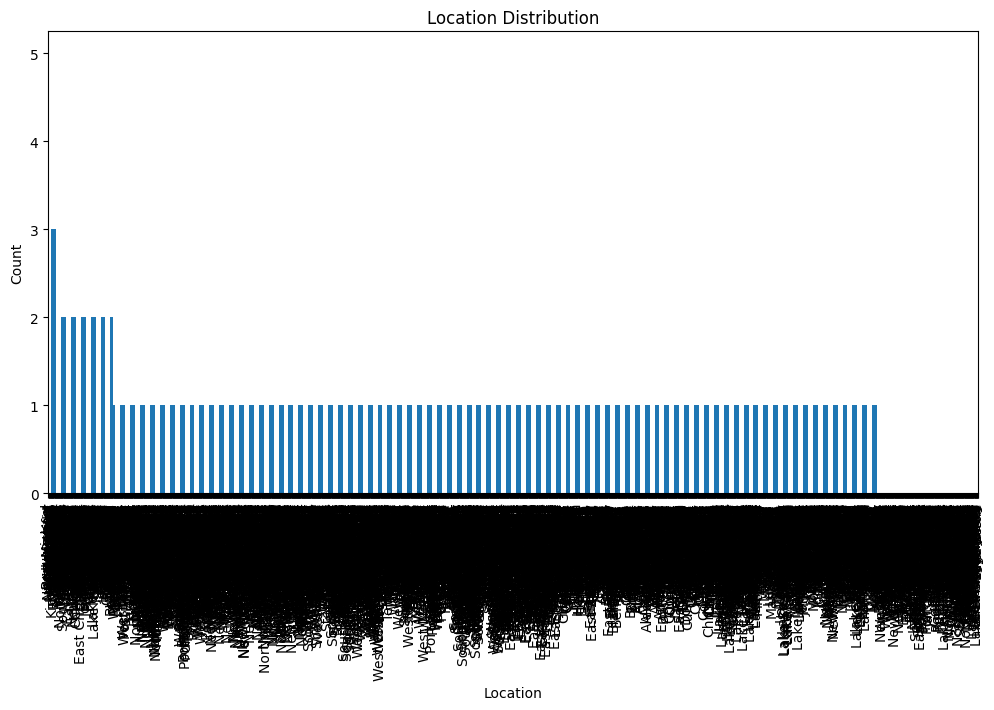

In [57]:
# Plotting the distribution of Location
plt.figure(figsize=(12, 6))
customer_demographics_no_outliers['Location'].value_counts().plot(kind='bar')
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

The exploratory data analysis (EDA) has been performed on the dataset without outliers. The distributions of Age, Gender, Income Level, and Location have been visualized.

> save clean csv as cleaned_customer_demographics

In [58]:
# Save the cleaned dataset as a CSV file
customer_demographics.to_csv('cleaned_customer_demographics.csv', index=False)

The cleaned dataset has been saved as 'cleaned_customer_demographics.csv'.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=75d892d6-30c7-41a5-bc07-70602fe7eb28' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>